In [1]:
# A PROJECT REPORT ON SALES
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("c:/users/THIS/Downloads/Financial_Sample.xlsx")
df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              692 non-null    object        
 1   Country              689 non-null    object        
 2   Product              692 non-null    object        
 3   Discount Band        638 non-null    object        
 4   Units Sold           695 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           693 non-null    float64       
 7   Gross Sales          695 non-null    float64       
 8   Discounts            695 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [9]:
df.isnull().sum()

Segment                 8
Country                11
Product                 8
Discount Band          62
Units Sold              5
Manufacturing Price     0
Sale Price              7
Gross Sales             5
Discounts               5
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [16]:
#  4 Object Columns having null values
#  4 float64 columns having null values
df.isnull().sum().sum()/df.size*100
# Only 1% data is null (almost)

0.9910714285714285

In [23]:
df.select_dtypes(include="object").isnull().sum()

Segment           8
Country          11
Product           8
Discount Band    62
Month Name        0
dtype: int64

In [35]:
# Replace null values of objects by mode values
def fillObj(obj):
    df[obj]=df[obj].fillna(df[obj].mode()[0])
for ob in df.select_dtypes(include="object"):
    fillObj(ob)
df.select_dtypes(include="object").isnull().sum()

Segment          0
Country          0
Product          0
Discount Band    0
Month Name       0
dtype: int64

In [39]:
df.select_dtypes(include="float64").isnull().sum()

Units Sold     5
Sale Price     7
Gross Sales    5
Discounts      5
 Sales         0
COGS           0
Profit         0
dtype: int64

In [41]:
# Replace null values of float64 by mean values
def fillFloat(obj):
    df[obj]=df[obj].fillna(df[obj].mean())
for ob in df.select_dtypes("float64"):
    fillFloat(ob)
df.select_dtypes(include="float64").isnull().sum()

Units Sold     0
Sale Price     0
Gross Sales    0
Discounts      0
 Sales         0
COGS           0
Profit         0
dtype: int64

In [43]:
# Total Null Values in DataFrame
df.isnull().sum().sum()

0

In [44]:
df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,High,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,High,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,High,2178.0,3,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


In [48]:
df["Month Name"].unique()

array(['January', 'June', 'December', 'March', 'July', 'August',
       'September', 'October', 'February', 'November', 'April', 'May'],
      dtype=object)

In [66]:
# X values for ploting
Xmonth = ['January','February', 'March', 'April', 'May','June',  'July', 'August',
       'September', 'October',  'November','December']
for index in range(0,len(Xmonth)):
    Xmonth[index]=Xmonth[index][0:3]
Xmonth

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [77]:
# Y values for ploting (Calculating Profit By Months)
Yprofit = []
YGS = []
for mon in Xmonth:
    totalProfit = 0
    totalGS = 0
    for index in range(0,df.shape[0]):
        if(df["Month Name"][index][0:3]==mon):
            totalProfit=totalProfit+df["Profit"][index]
        if(df["Month Name"][index][0:3]==mon):
            totalGS=totalGS+df["Gross Sales"][index]
    Yprofit.append(totalProfit)
    YGS.append(totalGS)
Yprofit
YGS

[7463290.542446043,
 7874444.042446043,
 6124026.0,
 7429392.5,
 6767911.0,
 10268972.0,
 8833027.5,
 6325959.0,
 11575053.0,
 23308784.042446043,
 14289884.042446043,
 18516186.042446043]

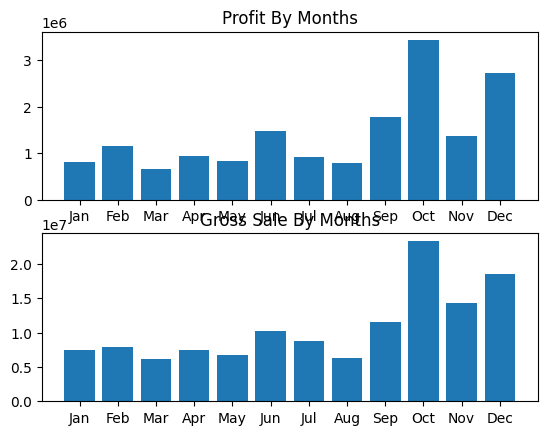

In [85]:
plt.subplot(2,1,1)
plt.bar(Xmonth,Yprofit)
plt.title("Profit By Months")
plt.subplot(2,1,2)
plt.bar(Xmonth,YGS)
plt.title("Gross Sale By Months")
plt.show()

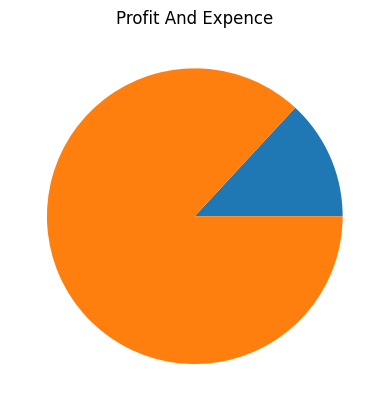

In [91]:
# Profit Percentage
profit = sum(Yprofit)/sum(YGS)*100
Expence = 100-profit
plt.pie([profit,Expence])
plt.title("Profit And Expence")
plt.show()